<a href="https://colab.research.google.com/github/ayushmangupta/DataScience/blob/master/mnistNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#!pip install tensorflow==2.0.0-beta1
#!pip install "tensorflow_hub==0.4.0"
%matplotlib inline

import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tfk = tf.keras
tfkl = tf.keras.layers
tf.__version__

'2.0.0-beta1'

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


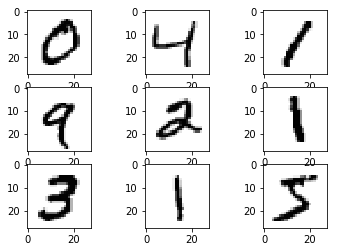

In [23]:
for i in range(9):
  plt.subplot('33'+str(i))
  plt.imshow(x_train[i],cmap='binary')

In [0]:
model = tf.keras.Sequential([
    tfkl.Flatten(input_shape=(28,28)),
    tfkl.Dense(64,input_shape=(784,),activation=tf.nn.relu),
    tfkl.BatchNormalization(),
    tfkl.Dense(64,input_shape=(64,),activation=tf.nn.relu),
    tfkl.Dropout(0.2),
    tfkl.Dense(10,activation=tf.nn.softmax)
    
])


model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.fit(x_train,y_train,epochs=10)

In [13]:
model.evaluate(x_test,y_test)


10000/10000 [==============================] - 0s 37us/sample - loss: 0.0799 - accuracy: 0.9777


[0.07985967071969062, 0.9777]

**Tf data**

In [0]:
# from tensor slices
d1s = tf.data.Dataset.from_tensor_slices(tf.range(10.0))
d2 = tf.data.Dataset.from_tensor_slices((tf.range(10.0),tf.range(10.0,20.0)))


#dataset3 = tf.data.Dataset.from_tensor_slices((tf.range(10), tf.arange(5)))
# Dataset not possible as zeroth dimenion is different at 10 and 5


In [0]:
#From tensors
#Just like from_tensor_slices, this method also accepts individual (or multiple) Numpy (or Tensors) objects. But this method doesn’t support batching of data, i.e all the data will be given out instantly.
#This method is useful in cases where dataset is very small or your learning model needs all the data at once.

dt1 = tf.data.Dataset.from_tensors(tf.range(50))
dt2 = tf.data.Dataset.from_tensors((tf.range(30, 45, 3), np.arange(60, 70, 2)))

dataset3 = tf.data.Dataset.from_tensors((tf.range(10), np.arange(5)))
# Possible with from_tensors, regardless of zeroth dimension mismatch of constituent elements.
# Emits data of ([1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4])


In [0]:
# from generator

def generator(seq_type):
  if seq_type == 1:
    for i in range(5):
      yield i*2
      
  elif seq_type == 2:
    for i in range(10):
      yield (i*3 , i**2)
      
  
  elif seq_type == 3:
    for i in range(1,4):
      yield (i,["i"]*i)
      

      
d1 = tf.data.Dataset.from_generator(generator,(tf.int32),args=([2]))

In [47]:
list(generator(3))

[(1, ['i']), (2, ['i', 'i']), (3, ['i', 'i', 'i'])]

**Transformation**
- Batch
- Map
- Shuffle
- Filter
- Repeat

In [53]:
d1s

<TensorSliceDataset shapes: (), types: tf.float32>

In [63]:

d1s.repeat(2)
list(d1s.shuffle(5))

def map_fu(x):
  return x*4


list(d1s.map(map_fu))

list(d1s.batch(4))

[<tf.Tensor: id=404288, shape=(4,), dtype=float32, numpy=array([0., 1., 2., 3.], dtype=float32)>,
 <tf.Tensor: id=404289, shape=(4,), dtype=float32, numpy=array([4., 5., 6., 7.], dtype=float32)>,
 <tf.Tensor: id=404290, shape=(2,), dtype=float32, numpy=array([8., 9.], dtype=float32)>]

In [0]:
def filter_func(x):
  return tf.reshape(tf.not_equal(x%5,1),[])

In [82]:
list(d1s.filter(filter_func))

[<tf.Tensor: id=404441, shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: id=404442, shape=(), dtype=float32, numpy=2.0>,
 <tf.Tensor: id=404443, shape=(), dtype=float32, numpy=3.0>,
 <tf.Tensor: id=404444, shape=(), dtype=float32, numpy=4.0>,
 <tf.Tensor: id=404445, shape=(), dtype=float32, numpy=5.0>,
 <tf.Tensor: id=404446, shape=(), dtype=float32, numpy=7.0>,
 <tf.Tensor: id=404447, shape=(), dtype=float32, numpy=8.0>,
 <tf.Tensor: id=404448, shape=(), dtype=float32, numpy=9.0>]

In [0]:
import gym

array([-0.01884262, -0.02749699, -0.0396476 , -0.00283798])

In [0]:
class ProbabilityDistribution(tf.keras.Model):
  def call(self,logits):
    print(logits)
    return tf.squeeze(tf.random.categorical(logits,1),axis=-1)
    
    


class Model(tf.keras.Model):
  
  def __init__(self,num_action):
    super().__init__('mlp_policy')
    self.hidden1 = tfkl.Dense(128,activation=tf.nn.relu)
    self.hidden2 = tfkl.Dense(128,activation=tf.nn.relu)
    self.value = tfkl.Dense(1,name= 'value')
    
    self.logits = tfkl.Dense(num_action, name="policy_logits")
    
    self.dist = ProbabilityDistribution()
 



  def call(self, inputs):
        # inputs is a numpy array, convert to Tensor
        x = tf.convert_to_tensor(inputs, dtype=tf.float32)
        # separate hidden layers from the same input tensor
        hidden_logs = self.hidden1(x)
        hidden_vals = self.hidden2(x)
        return self.logits(hidden_logs), self.value(hidden_vals)
  
  
  def action_value(self, obs):
        print(obs)
        # executes call() under the hood
        logits, value = self.predict(obs)
        action = self.dist.predict(logits)
        # a simpler option, will become clear later why we don't use it
        # action = tf.random.categorical(logits, 1)
        return np.squeeze(action, axis=-1), np.squeeze(value, axis=-1)
 

In [58]:
env = gym.make('CartPole-v0')
model = Model(num_action=env.action_space.n)
obs = env.reset()
action, value  = model.action_value(obs[None,:])
print(action, value)

[[ 0.02620837  0.04462336 -0.02533009 -0.04167841]]
Tensor("input_1_8:0", shape=(None, 2), dtype=float32)
1 [0.00486272]
